Import Library & Load Dataset

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from sklearn import preprocessing
from scipy.stats import pearsonr

In [71]:
data = pd.read_excel("EvaluasiTingkatStress.xlsx")
df = pd.DataFrame(data.loc[:, ['Usia', 'Jenis Kelamin', 'Status', 'Bekerja', 'Jam Tidur Perhari', 'Kesibukan Perhari', 'Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Feeling of Mastery', 'Cumulative Difficulty','Score', 'Tingkat Stress']])
df

,Usia,Jenis Kelamin,Status,Bekerja,Jam Tidur Perhari,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Feeling of Mastery,Cumulative Difficulty,Score,Tingkat Stress
0,19,Perempuan,Mahasiswa,Tidak,1,8,4,3,5,4,3,5,5,5,34,High Perceived Stress
1,20,Laki-laki,Mahasiswa,Ya,3,15,5,5,5,2,3,2,5,2,29,High Perceived Stress
2,22,Perempuan,Mahasiswa,Tidak,3,8,5,5,5,4,4,5,5,5,38,High Perceived Stress
3,18,Perempuan,Mahasiswa,Ya,3,10,4,3,5,4,4,4,5,4,33,High Perceived Stress
4,18,Perempuan,Mahasiswa,Tidak,3,4,3,5,5,4,5,5,5,5,37,High Perceived Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,18,Perempuan,Mahasiswa,Tidak,8,8,1,3,3,3,3,3,4,2,22,Stress Moderated
152,24,Perempuan,Mahasiswa,Tidak,8,4,3,2,4,2,3,2,3,3,22,Stress Moderated
153,24,Perempuan,Mahasiswa,Tidak,8,15,5,4,3,2,4,4,2,5,29,High Perceived Stress
154,15,Laki-laki,Pelajar,Tidak,10,5,3,5,4,4,4,3,4,4,31,High Perceived Stress


In [72]:
# Mendeteksi missing value pada variabel
if df.isnull().values.any():
    print("\n---Berikut nilai-nilai yang hilang pada data:---")
    print("")
    print(df[df.isnull().any(axis=1)])
else:
    print("\n---Tidak terdapat missing value pada data---")

# Mengganti missing value dengan mean
if df.isnull().values.any():
    df = df.fillna(df.mean())
    print("\n---Berikut hasil missing value pada data yang sudah diperbaiki:---")
    print("")
    print(df)
else:
    print("")



---Tidak terdapat missing value pada data---



In [73]:
df['Jenis Kelamin'].replace({'Laki-laki':0, 'Perempuan':1}, inplace=True)
df['Status'].replace({'Pelajar':0,'Mahasiswa':1,'Lainnya':2}, inplace=True)
df['Bekerja'].replace({'Tidak':0,'Ya':1}, inplace=True)
df['Tingkat Stress'].replace({'Low Stress':1, 'Stress Moderated':2, 'High Perceived Stress':3,}, inplace=True)
df

,Usia,Jenis Kelamin,Status,Bekerja,Jam Tidur Perhari,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Feeling of Mastery,Cumulative Difficulty,Score,Tingkat Stress
0,19,1,1,0,1,8,4,3,5,4,3,5,5,5,34,3
1,20,0,1,1,3,15,5,5,5,2,3,2,5,2,29,3
2,22,1,1,0,3,8,5,5,5,4,4,5,5,5,38,3
3,18,1,1,1,3,10,4,3,5,4,4,4,5,4,33,3
4,18,1,1,0,3,4,3,5,5,4,5,5,5,5,37,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,18,1,1,0,8,8,1,3,3,3,3,3,4,2,22,2
152,24,1,1,0,8,4,3,2,4,2,3,2,3,3,22,2
153,24,1,1,0,8,15,5,4,3,2,4,4,2,5,29,3
154,15,0,0,0,10,5,3,5,4,4,4,3,4,4,31,3


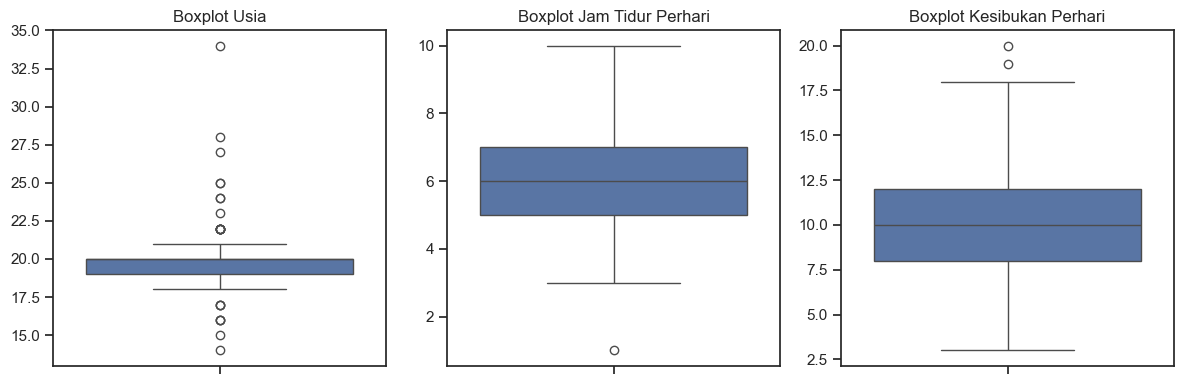

Outliers for Usia:
[22 22 28 17 25 16 17 17 22 16 22 25 27 22 23 14 22 34 16 22 24 24 15]
Outliers for Jam Tidur Perhari:
[1]
Outliers for Kesibukan Perhari:
[20 19]


In [74]:
# Variabel input yang akan divisualisasikan
vars_to_plot = ['Usia', 'Jam Tidur Perhari', 'Kesibukan Perhari']

# Membuat satu gambar yang berisi boxplot untuk masing-masing variabel input
fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

outliers_data = {}  # Dictionary untuk menyimpan nilai outlier

for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Boxplot {var}')
    ax.set_ylabel('')

    # Menghitung nilai outlier
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    outliers = df[(df[var] > upper_bound) | (df[var] < lower_bound)][var]
    
    # Menyimpan nilai outlier ke dalam dictionary
    outliers_data[var] = outliers

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

# Mencetak nilai outlier
for var, outliers in outliers_data.items():
    print(f'Outliers for {var}:')
    print(outliers.values)  # Mencetak nilai outlier dari dictionary

Handling outliers for Usia with mean value.
[22 22 28 17 25 16 17 17 22 16 22 25 27 22 23 14 22 34 16 22 24 24 15]
Handling outliers for Jam Tidur Perhari with mean value.
[1]
Handling outliers for Kesibukan Perhari with mean value.
[20 19]


C:\Users\Airlangga\AppData\Local\Temp\ipykernel_46760\1753630760.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '19.826923076923077' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[var].isin(outliers), var] = mean_value
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_46760\1753630760.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.846153846153846' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[var].isin(outliers), var] = mean_value
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_46760\1753630760.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10.307692307692308' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df

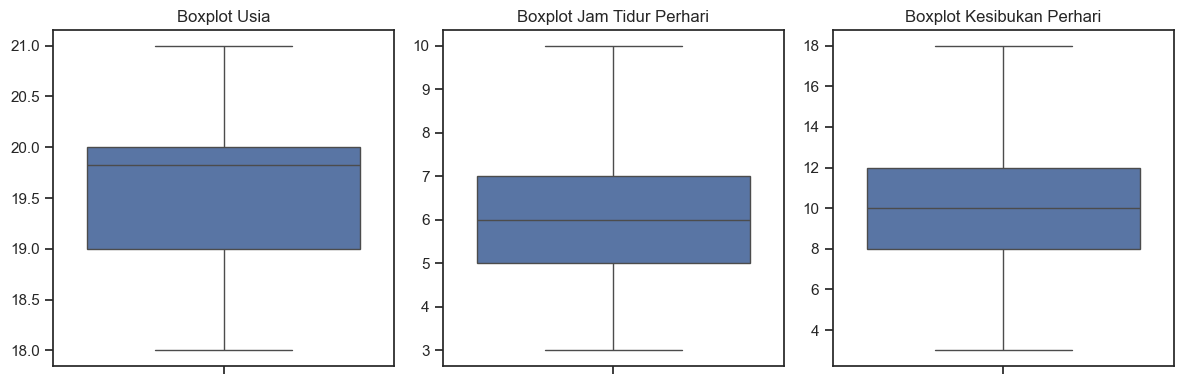

In [75]:
# Mengganti outlier dengan nilai mean
for var, outliers in outliers_data.items():
    if not outliers.empty:
        # Hitung nilai mean variabel
        mean_value = df[var].mean()
        
        # Ganti outlier dengan nilai mean
        df.loc[df[var].isin(outliers), var] = mean_value

# Sekarang, outlier telah diganti dengan nilai mean. Anda dapat mengeceknya dengan kode berikut:
for var, outliers in outliers_data.items():
    if not outliers.empty:
        print(f'Handling outliers for {var} with mean value.')
        print(outliers.values)  # Mencetak nilai outlier yang telah diganti dengan nilai mean

# Membuat satu gambar yang berisi boxplot untuk masing-masing variabel input
fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Boxplot {var}')
    ax.set_ylabel('')

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()


In [76]:
dfClean = df

Korelasi antara variabel input dan output

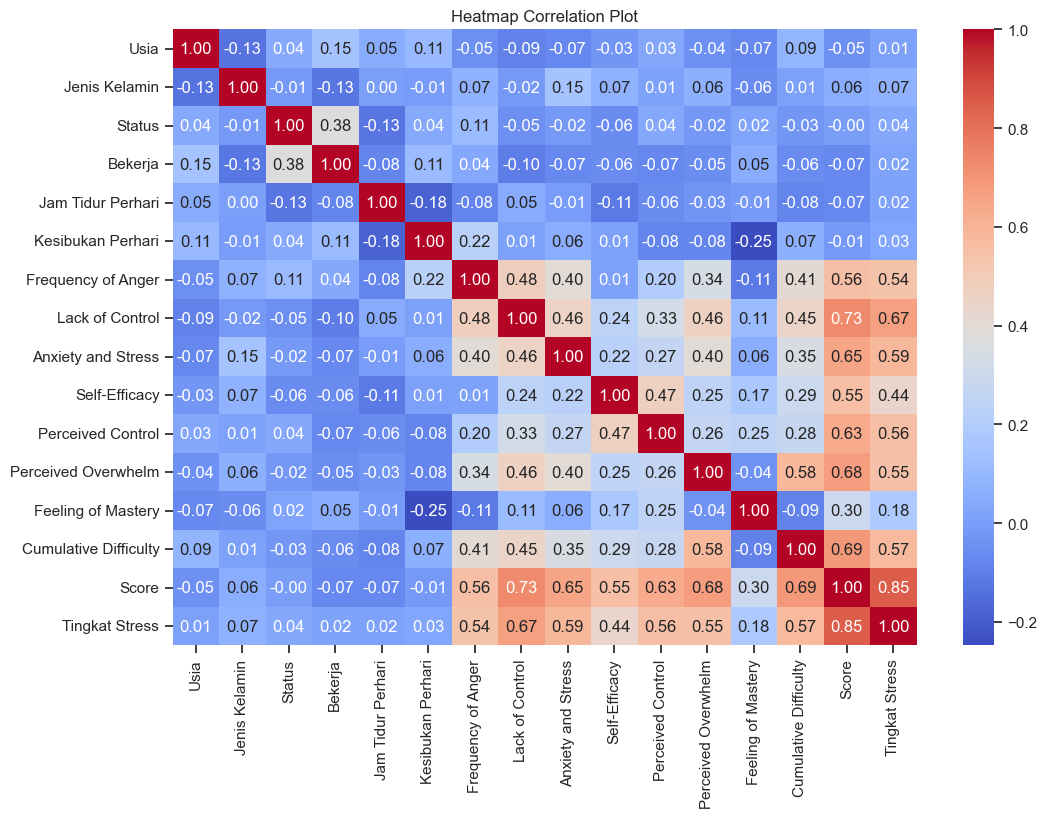

In [77]:
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat Heatmap Correlation Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation Plot')
plt.show()

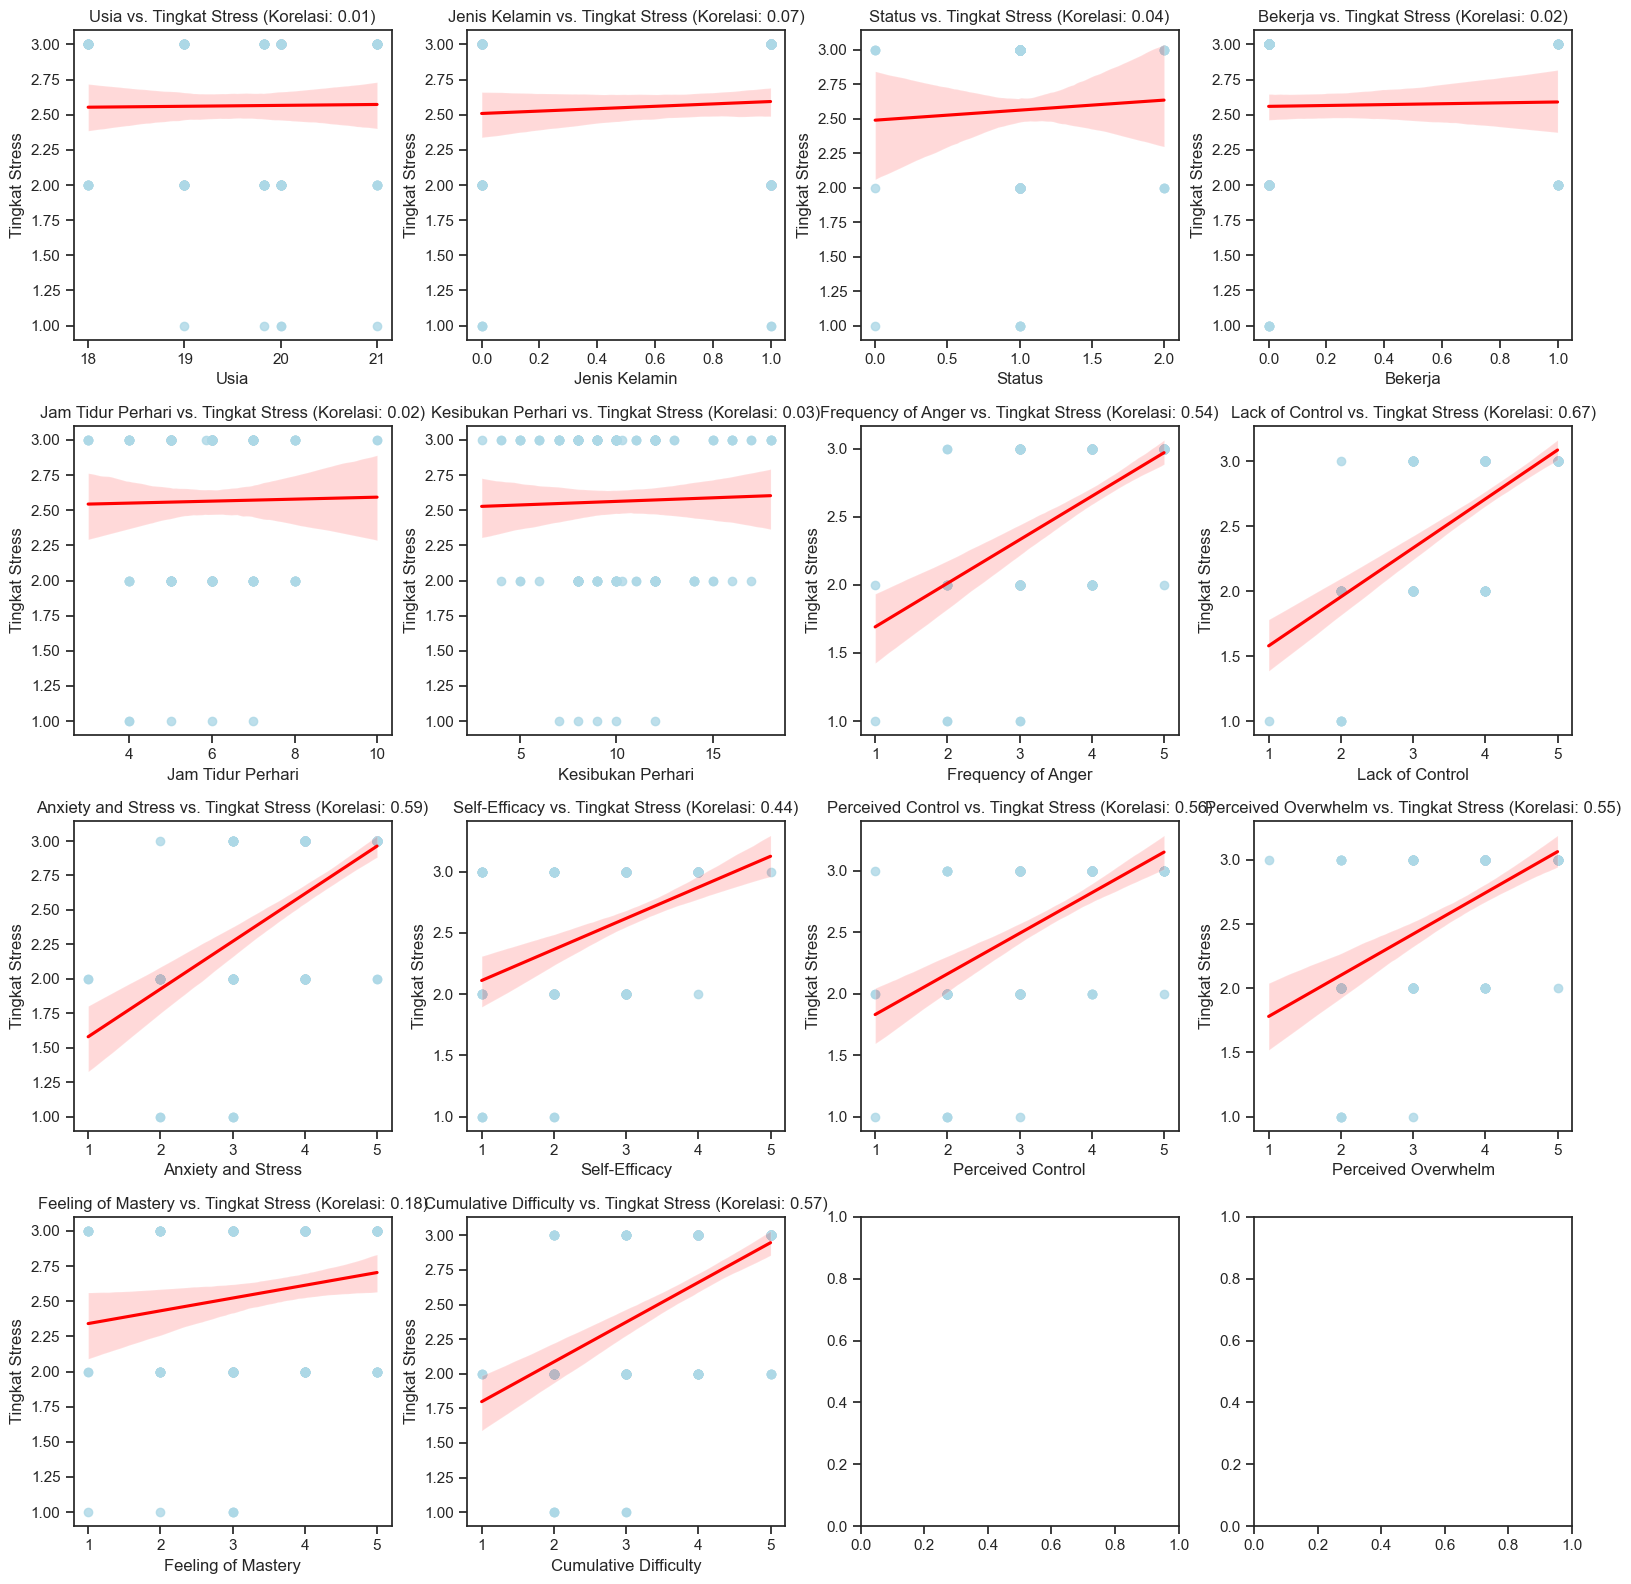

In [78]:
# Daftar variabel input
input_vars = ['Usia', 'Jenis Kelamin', 'Status', 'Bekerja', 'Jam Tidur Perhari', 'Kesibukan Perhari', 'Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Feeling of Mastery', 'Cumulative Difficulty']

# Membuat satu gambar yang berisi semua scatter plot
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i, var in enumerate(input_vars):
    row, col = i // 4, i % 4
    ax = axes[row, col]
    
    # Scatter plot dengan garis regresi
    sns.regplot(data=df, x=var, y='Tingkat Stress', scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}, ax=ax)
    
    # Menghitung koefisien korelasi Pearson
    corr_coeff, _ = pearsonr(df[var], df['Tingkat Stress'])
    corr_coeff = np.round(corr_coeff, 2)
    
    ax.set_title(f'{var} vs. Tingkat Stress (Korelasi: {corr_coeff})')
    ax.set_xlabel(var)
    ax.set_ylabel('Tingkat Stress')

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

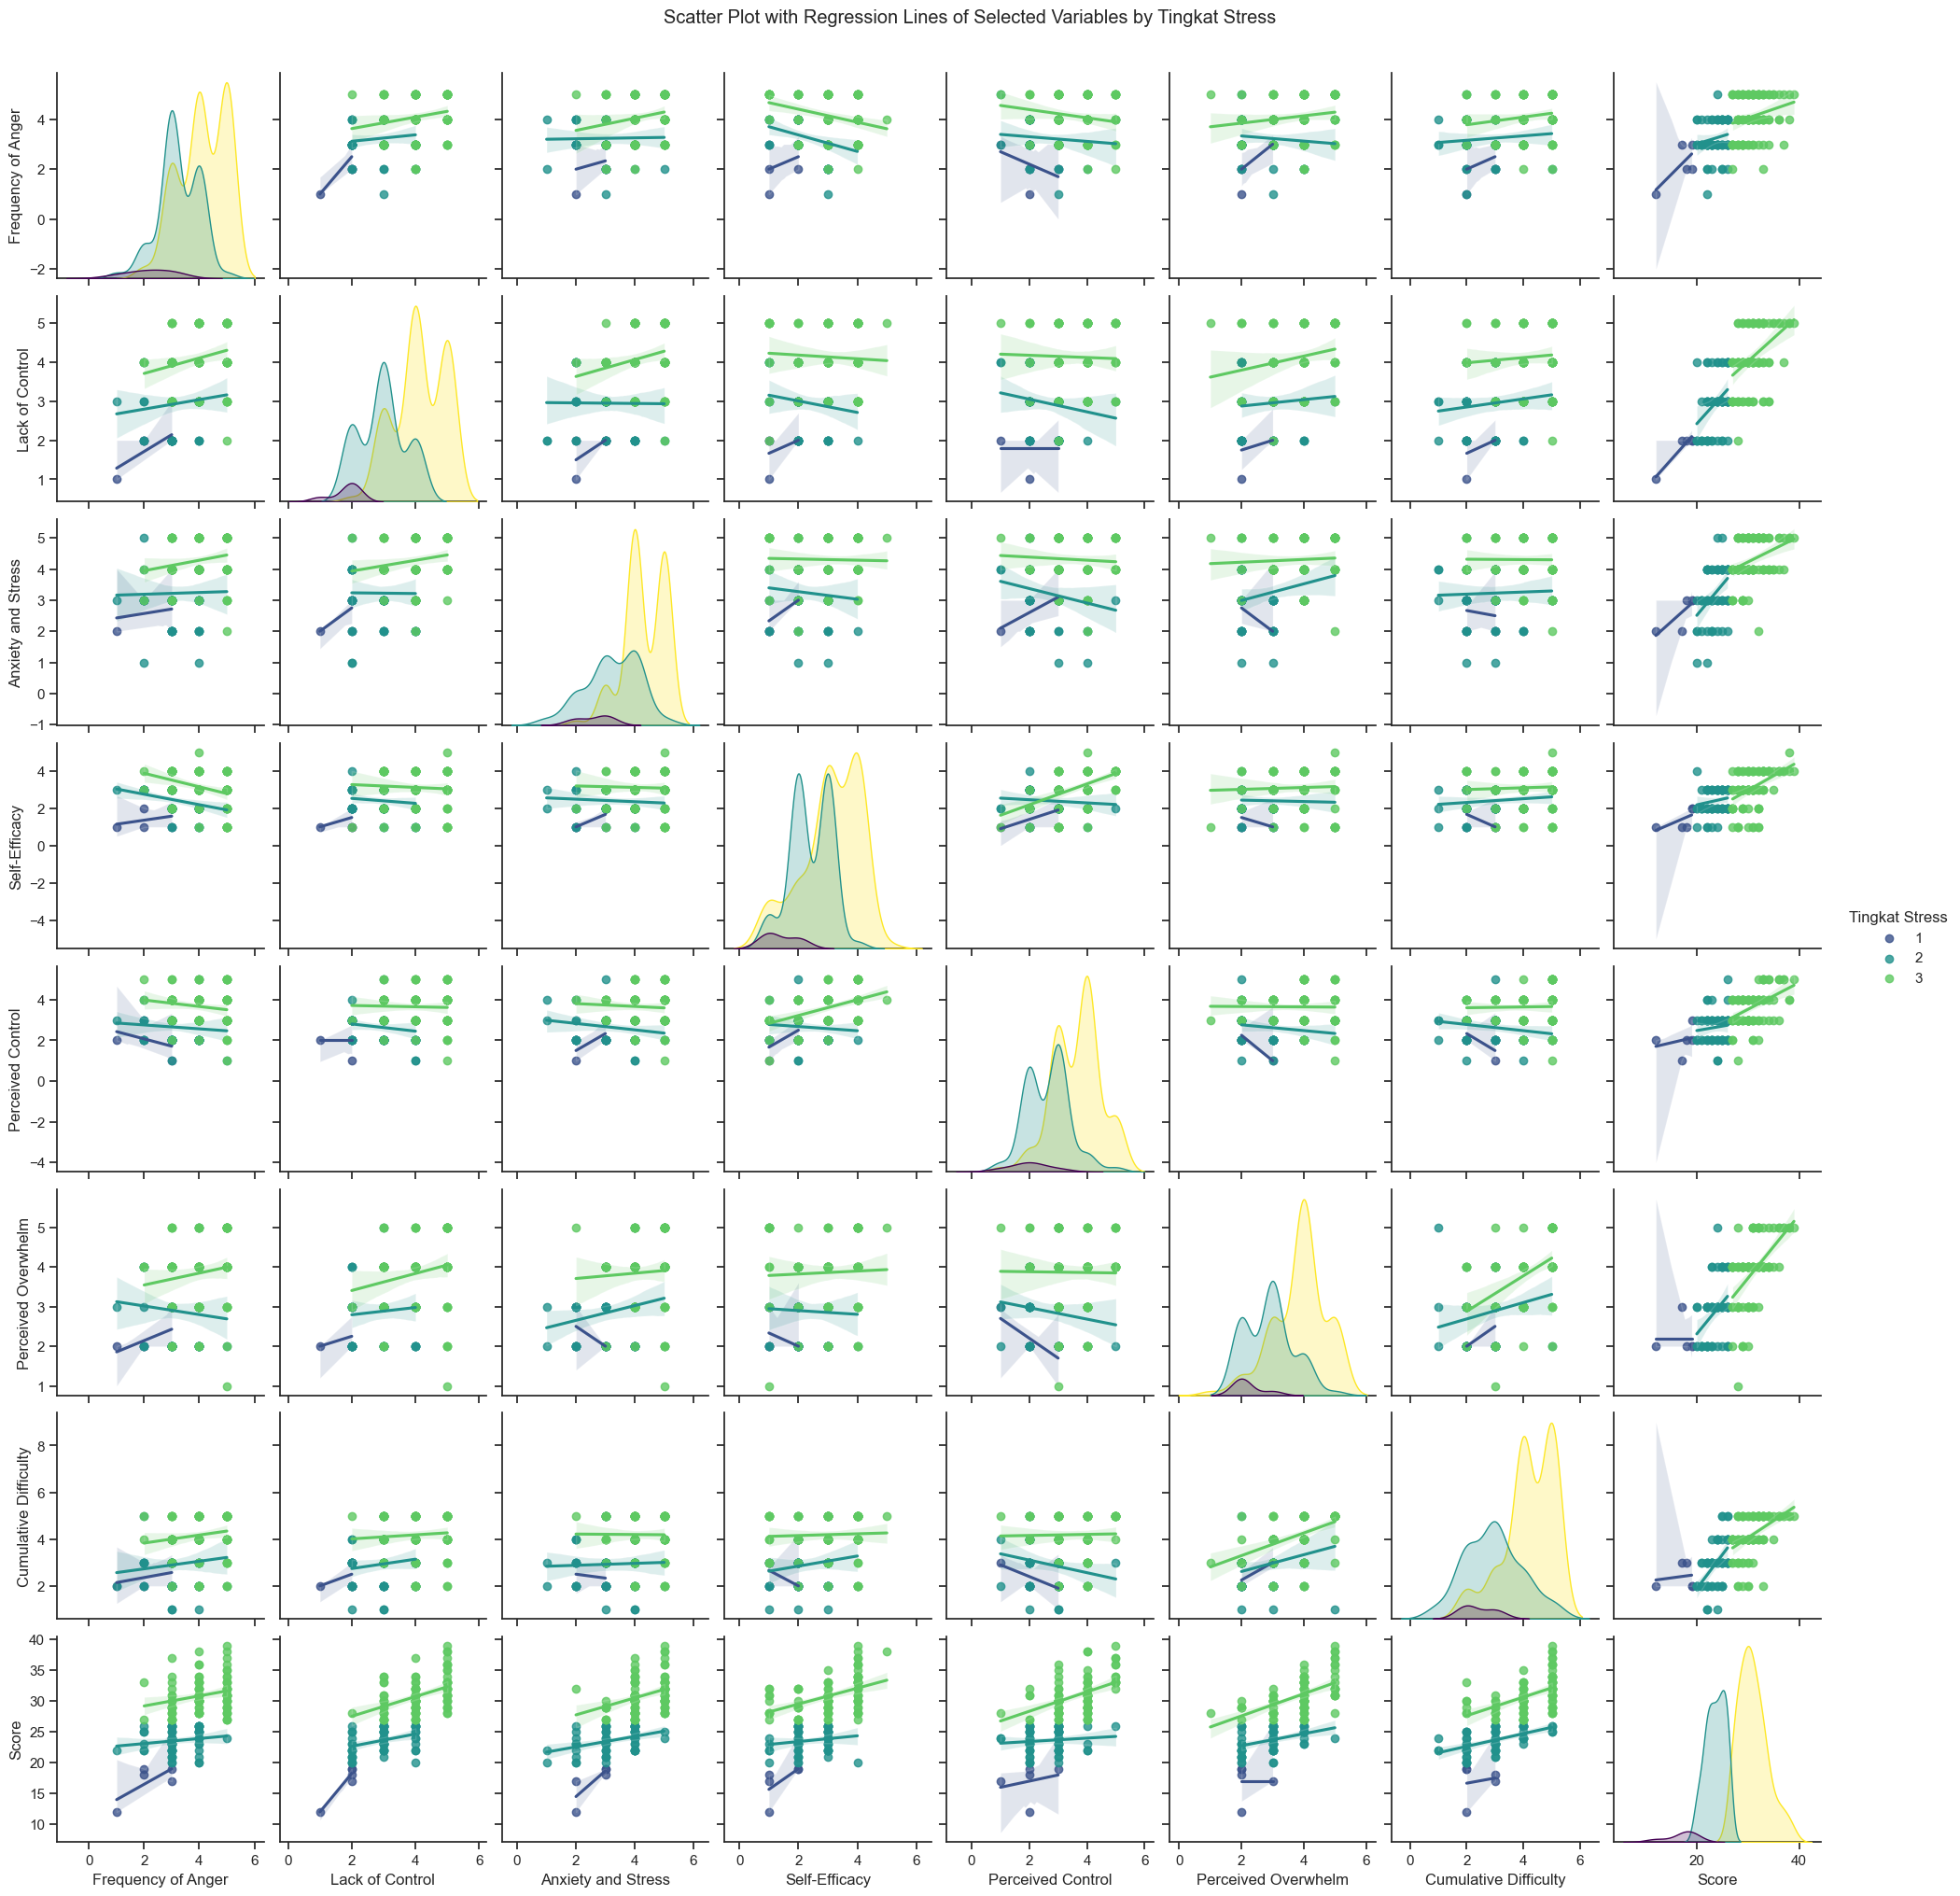

In [79]:
# Variabel-variabel yang akan digunakan dalam scatter plot
vars_to_plot = ['Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Cumulative Difficulty', 'Score']

# Membuat scatter plot dengan garis regresi
plt.figure(figsize=(14, 10))
sns.set(style="ticks")
scatter_plot = sns.pairplot(data=df, vars=vars_to_plot, hue='Tingkat Stress', palette='viridis', kind='reg')
scatter_plot.fig.suptitle('Scatter Plot with Regression Lines of Selected Variables by Tingkat Stress', y=1.02)
plt.show()

2D Visualization

C:\Users\Airlangga\AppData\Local\Temp\ipykernel_46760\3767197018.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=var, y='Tingkat Stress', ci=None, ax=ax)
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_46760\3767197018.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=var, y='Tingkat Stress', ci=None, ax=ax)
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_46760\3767197018.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=var, y='Tingkat Stress', ci=None, ax=ax)
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_46760\3767197018.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=var, y='Tingkat Stress', ci=None, ax=ax)
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_46760\3767197018.py:22: Futu

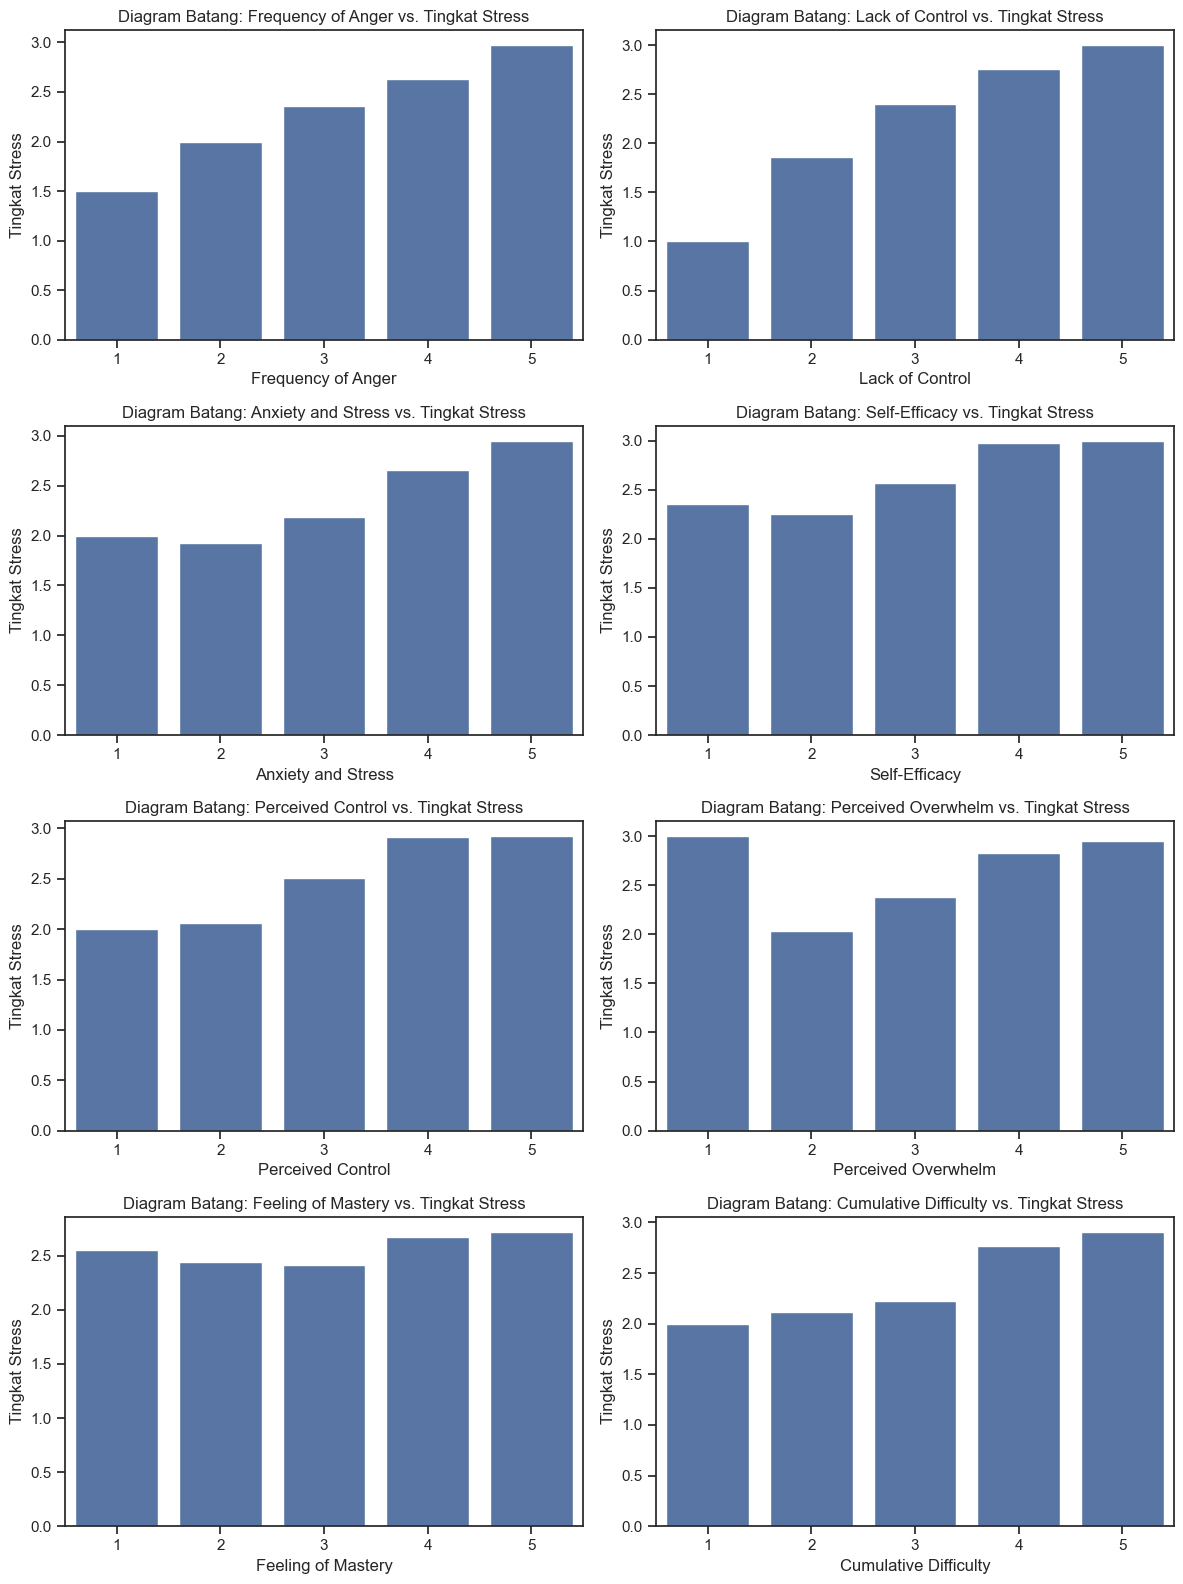

In [80]:
# Variabel input yang akan divisualisasikan
vars_to_plot = ['Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Feeling of Mastery', 'Cumulative Difficulty']

# Menghitung jumlah variabel input
num_vars = len(vars_to_plot)

# Menentukan jumlah maksimum kolom (width) per baris
max_columns = 2

# Menghitung jumlah baris yang diperlukan
num_rows = (num_vars + max_columns - 1) // max_columns

# Membuat satu gambar dengan subplot sesuai dengan jumlah baris dan kolom
fig, axes = plt.subplots(num_rows, max_columns, figsize=(12, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(vars_to_plot):
    row = i // max_columns
    col = i % max_columns

    ax = axes[row, col]
    sns.barplot(data=df, x=var, y='Tingkat Stress', ci=None, ax=ax)
    ax.set_title(f'Diagram Batang: {var} vs. Tingkat Stress')
    ax.set_xlabel(var)
    ax.set_ylabel('Tingkat Stress')

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

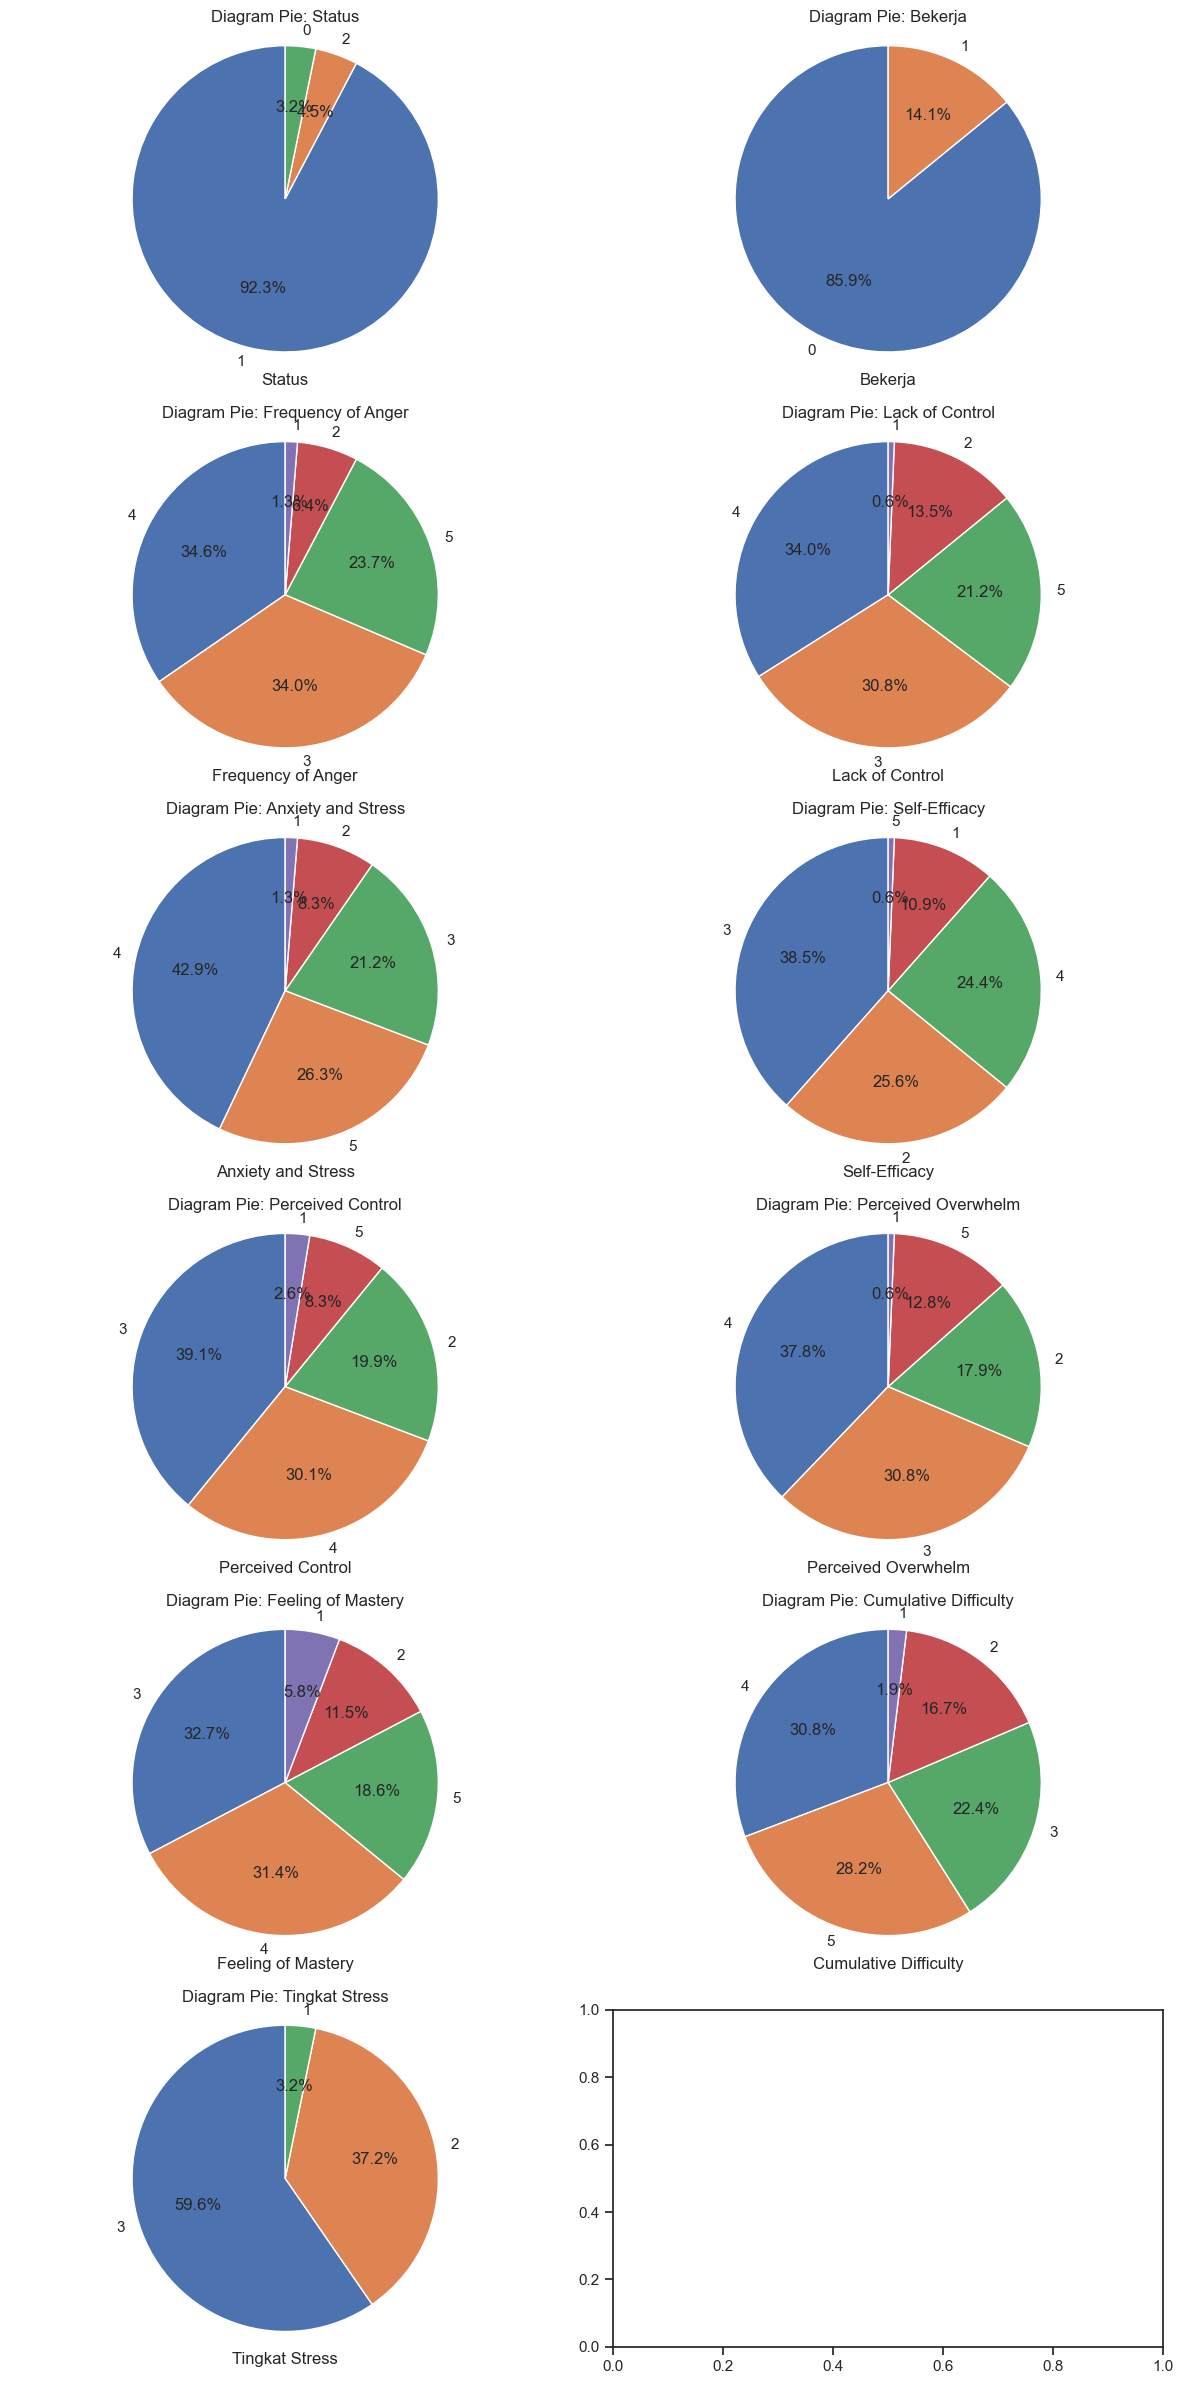

In [91]:
# Variabel input yang akan divisualisasikan
vars_to_plot = ['Status','Bekerja','Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm','Feeling of Mastery', 'Cumulative Difficulty','Tingkat Stress']

# Menghitung jumlah variabel input
num_vars = len(vars_to_plot)

# Menentukan jumlah maksimum kolom (width) per baris
max_columns = 2

# Menghitung jumlah baris yang diperlukan
num_rows = (num_vars + max_columns - 1) // max_columns

# Membuat satu gambar dengan subplot sesuai dengan jumlah baris dan kolom
fig, axes = plt.subplots(num_rows, max_columns, figsize=(12, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(vars_to_plot):
    row = i // max_columns
    col = i % max_columns

    ax = axes[row, col]

    # Menghitung jumlah data untuk masing-masing kategori
    category_counts = df[var].value_counts()

    # Mengambil label kategori
    categories = category_counts.index

    # Mengambil jumlah data untuk setiap kategori
    counts = category_counts.values

    # Membuat diagram pie
    ax.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Agar diagram pie menjadi lingkaran

    ax.set_title(f'Diagram Pie: {var}')
    ax.set_xlabel(var)

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

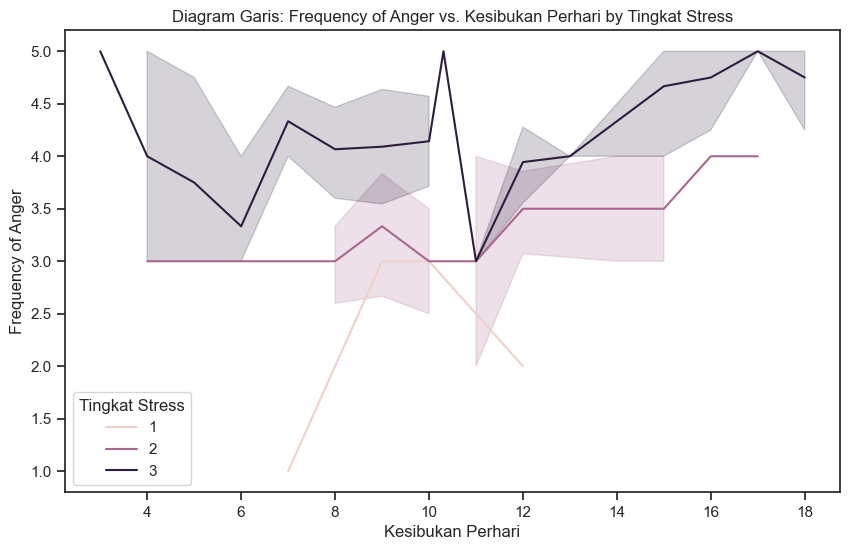

In [90]:
# Pilih variabel input yang ingin digunakan
var_input = 'Frequency of Anger'

# Membuat plot garis
plt.figure(figsize=(10, 6))
sns.lineplot(data=dfClean, x='Kesibukan Perhari', y=var_input, hue='Tingkat Stress')
plt.title(f'Diagram Garis: {var_input} vs. Kesibukan Perhari by Tingkat Stress')
plt.xlabel('Kesibukan Perhari')
plt.ylabel(var_input)
plt.legend(title='Tingkat Stress')
plt.show()

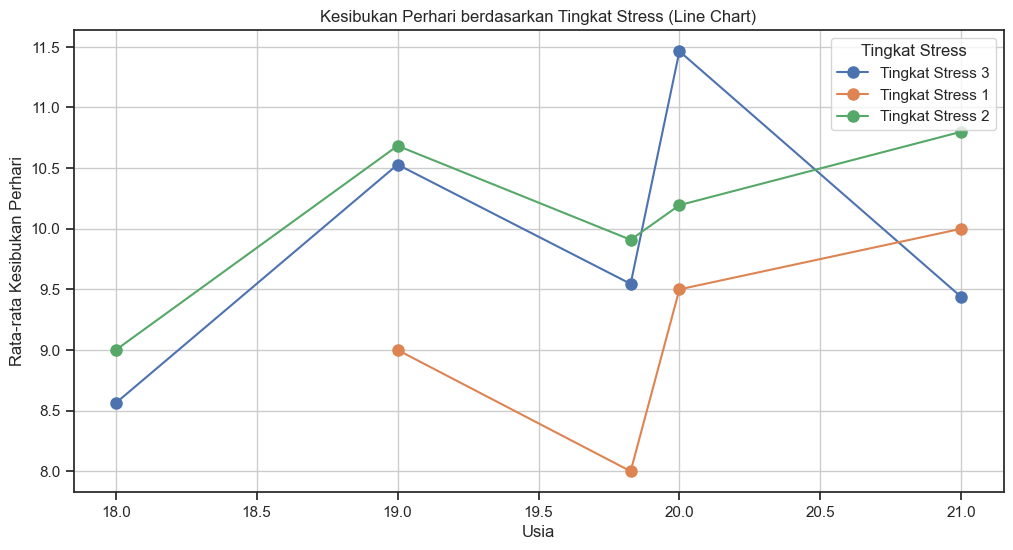

In [83]:
plt.figure(figsize=(12, 6))

for tingkat_stress in dfClean['Tingkat Stress'].unique():
    sub_data = dfClean[dfClean['Tingkat Stress'] == tingkat_stress]
    plt.plot(sub_data.groupby('Usia')['Kesibukan Perhari'].mean(), marker='o', linestyle='-', markersize=8, label=f'Tingkat Stress {tingkat_stress}')

plt.title('Kesibukan Perhari berdasarkan Tingkat Stress (Line Chart)')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Kesibukan Perhari')
plt.legend(title='Tingkat Stress')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

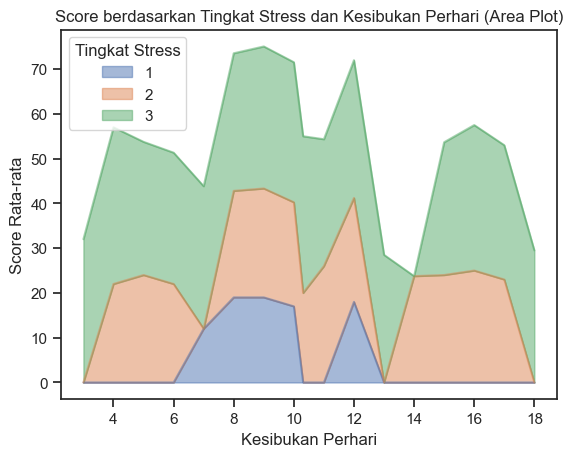

In [92]:
# Area Plot
plt.figure(figsize=(12, 6))
pivot_df = dfClean.pivot_table(index='Kesibukan Perhari', columns='Tingkat Stress', values='Score', aggfunc='mean')
pivot_df.plot(kind='area', alpha=0.5, stacked=True)
plt.title('Score berdasarkan Tingkat Stress dan Kesibukan Perhari (Area Plot)')
plt.xlabel('Kesibukan Perhari')
plt.ylabel('Score Rata-rata')
plt.legend(title='Tingkat Stress', loc='upper left')
plt.show()


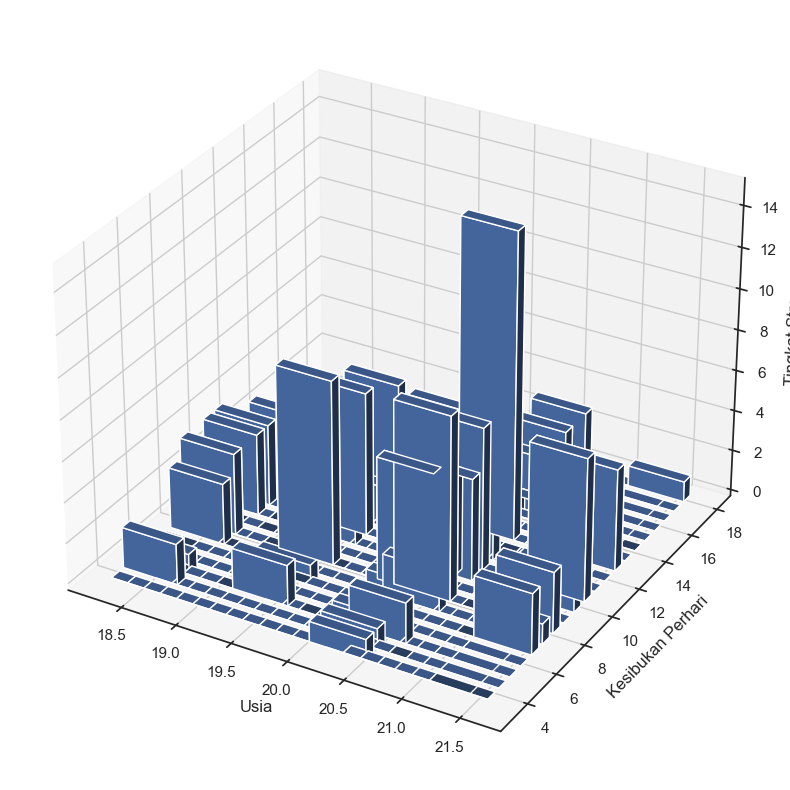

In [93]:
# Buat dataframe df dari data yang telah Anda sediakan

# Menggunakan kolom "Usia", "Kesibukan Perhari", dan "Tingkat Stress" untuk plot 3D
x = dfClean['Usia']
y = dfClean['Kesibukan Perhari']
z = dfClean['Tingkat Stress']

# Membuat figure dan axes 3D
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

# Membuat histogram 3D
hist, xedges, yedges = np.histogram2d(x, y, bins=(20, 20))
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")

xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.5
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

# Label sumbu
ax.set_xlabel('Usia')
ax.set_ylabel('Kesibukan Perhari')
ax.set_zlabel('Tingkat Stress')

plt.show()


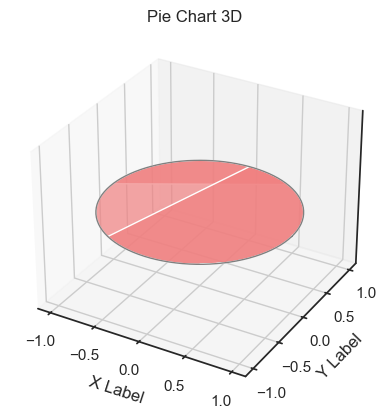

In [94]:

# Menghitung jumlah observasi untuk setiap kombinasi Jenis Kelamin dan Status
grouped = dfClean.groupby(['Jenis Kelamin', 'Status']).size().reset_index(name='count')

# Data untuk pie chart
labels = grouped['Status']
sizes = grouped['count']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Pie chart pieces will be exploded

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Membuat sebuah lingkaran dengan ukuran yang sama sebagai dasar untuk pie chart
theta = np.linspace(0, 2 * np.pi, 100)
r = 1
x = r * np.cos(theta)
y = r * np.sin(theta)
z = np.zeros(100)

# Menggambar dasar lingkaran
ax.plot(x, y, z, color='gray', lw=1)

# Membuat pie chart dalam 3D
verts = [list(zip(x, y, z))]
for i in range(len(labels)):
    values = sizes[i]
    angle = 360 * (values / sum(sizes))
    start = i * (360 / len(labels))
    end = start + angle
    verts.append(list(zip(x, y, z)))
    for j in range(100):
        verts[i + 1][j] = (
            r * np.cos(np.radians(start + (j / 100) * angle)),
            r * np.sin(np.radians(start + (j / 100) * angle)),
            0
        )

poly = Poly3DCollection(verts, facecolors=colors, alpha=0.7)
ax.add_collection3d(poly)

ax.set_title('Pie Chart 3D')
ax.set_zlabel('Jenis Kelamin')
ax.set_zticks([])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.show()

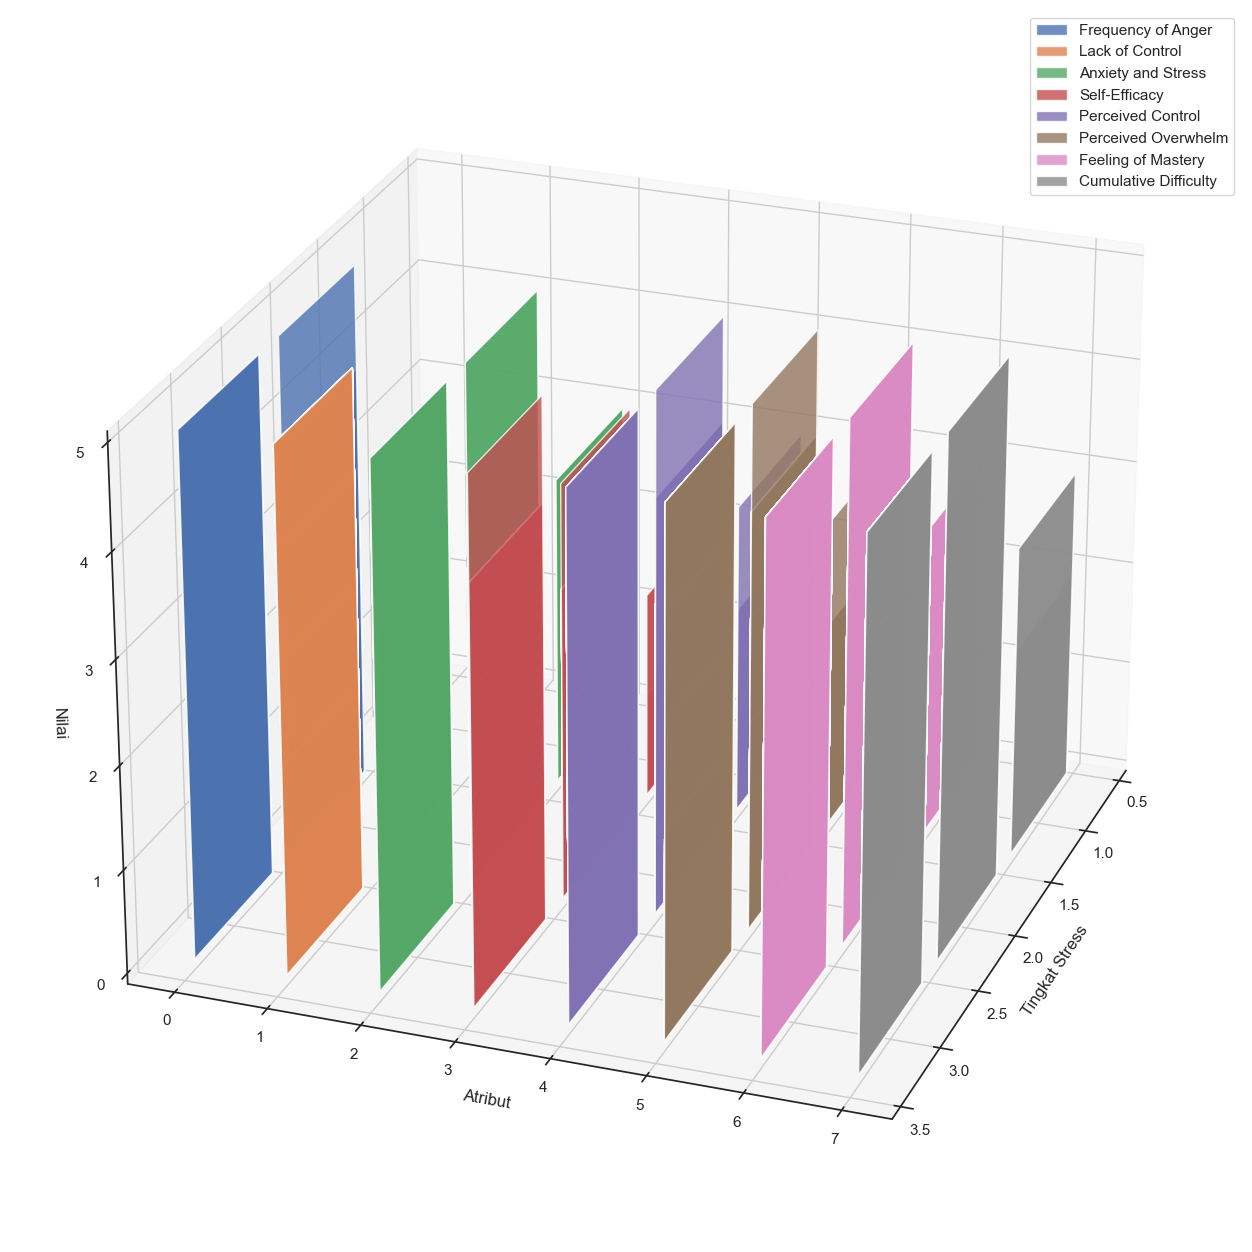

In [95]:
# 3D Bar Chart
# Membuat DataFrame baru dengan atribut yang relevan
df_3d = dfClean[['Tingkat Stress', 'Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Feeling of Mastery', 'Cumulative Difficulty']]

fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')

# Membuat bar chart 3D untuk atribut yang relevan
for n, column in enumerate(df_3d.columns[1:]):
    xs = df_3d['Tingkat Stress']
    ys = df_3d[column]
    zs = n

    ax.bar(xs, ys, zs, zdir='y', alpha=0.8, label=column)

# Label sumbu
ax.set_xlabel('Tingkat Stress')
ax.set_ylabel('Atribut')
ax.set_zlabel('Nilai')

# Menambahkan legenda
ax.legend()
ax.view_init(elev=25, azim=20)

plt.show()


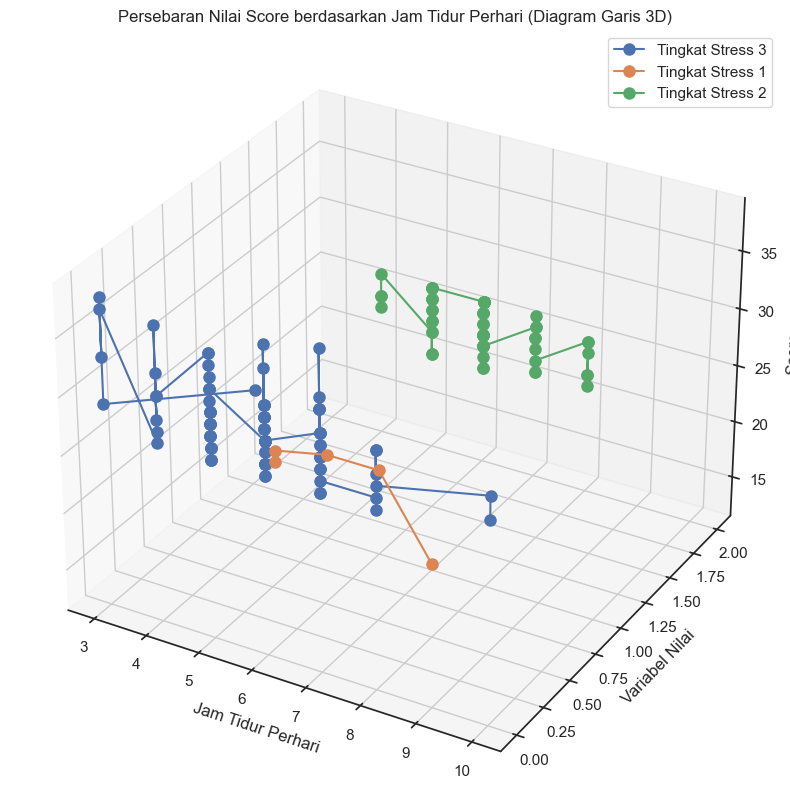

In [99]:
# Kolom yang ingin dibandingkan
tingkat_stress_values = dfClean['Tingkat Stress'].unique()

# Membuat plot 3D
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Menggunakan diagram garis 3D
for i, tingkat_stress in enumerate(tingkat_stress_values):
    sub_data = dfClean[dfClean['Tingkat Stress'] == tingkat_stress]
    xs = sub_data['Jam Tidur Perhari']
    ys = np.full_like(xs, i)
    zs = sub_data['Score']
    ax.plot(xs, ys, zs, marker='o', markersize=8, label=f'Tingkat Stress {tingkat_stress}')

# Menambahkan label sumbu
ax.set_xlabel('Jam Tidur Perhari')
ax.set_ylabel('Variabel Nilai')
ax.set_zlabel('Score')
ax.set_title('Persebaran Nilai Score berdasarkan Jam Tidur Perhari (Diagram Garis 3D)')

# Menambahkan legenda
ax.legend()
plt.show()


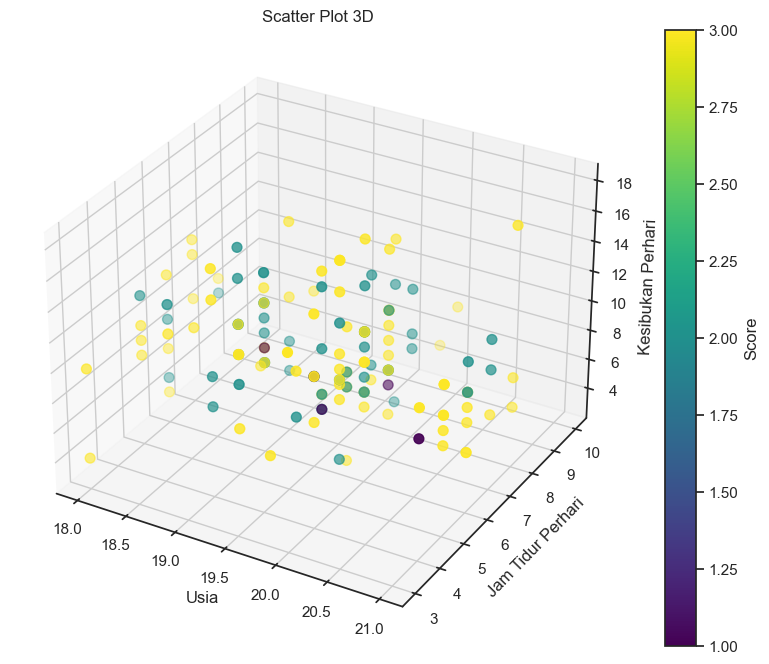

In [102]:
# Kolom yang digunakan untuk scatter plot
data1 = dfClean['Usia']
data2 = dfClean['Jam Tidur Perhari']
data3 = dfClean['Kesibukan Perhari']

# Grup dan label untuk digunakan dalam plot
group = dfClean['Tingkat Stress']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tambahkan label sumbu
ax.set_xlabel('Usia')
ax.set_ylabel('Jam Tidur Perhari')
ax.set_zlabel('Kesibukan Perhari')

# Tambahkan grid
ax.grid(True)

# Tambahkan scatter plot dengan warna yang lebih kontras
scatter = ax.scatter(data1, data2, data3, c=group, cmap='viridis', s=50)

# Tambahkan colorbar dengan label grup
colorbar = plt.colorbar(scatter)
colorbar.set_label('Score')

# Tambahkan judul plot
plt.title('Scatter Plot 3D')

plt.show()